Loading and cleaning data...
File not found. Creating sample data for demonstration...
Sample data created for demonstration

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productTitle   200 non-null    object 
 1   originalPrice  157 non-null    float64
 2   price          200 non-null    object 
 3   sold           200 non-null    int64  
 4   tagText        200 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB
None

First few rows:
                                        productTitle  originalPrice    price  \
0         Bookshelf 5-Tier Storage Organizer Model 1     402.340634  $372.82   
1  Ergonomic Office Chair with Lumbar Support Mod...     308.535206  $221.15   
2          Wooden Coffee Table Modern Design Model 3      20.373808   $12.29   
3              Computer Gaming Chair RGB LED

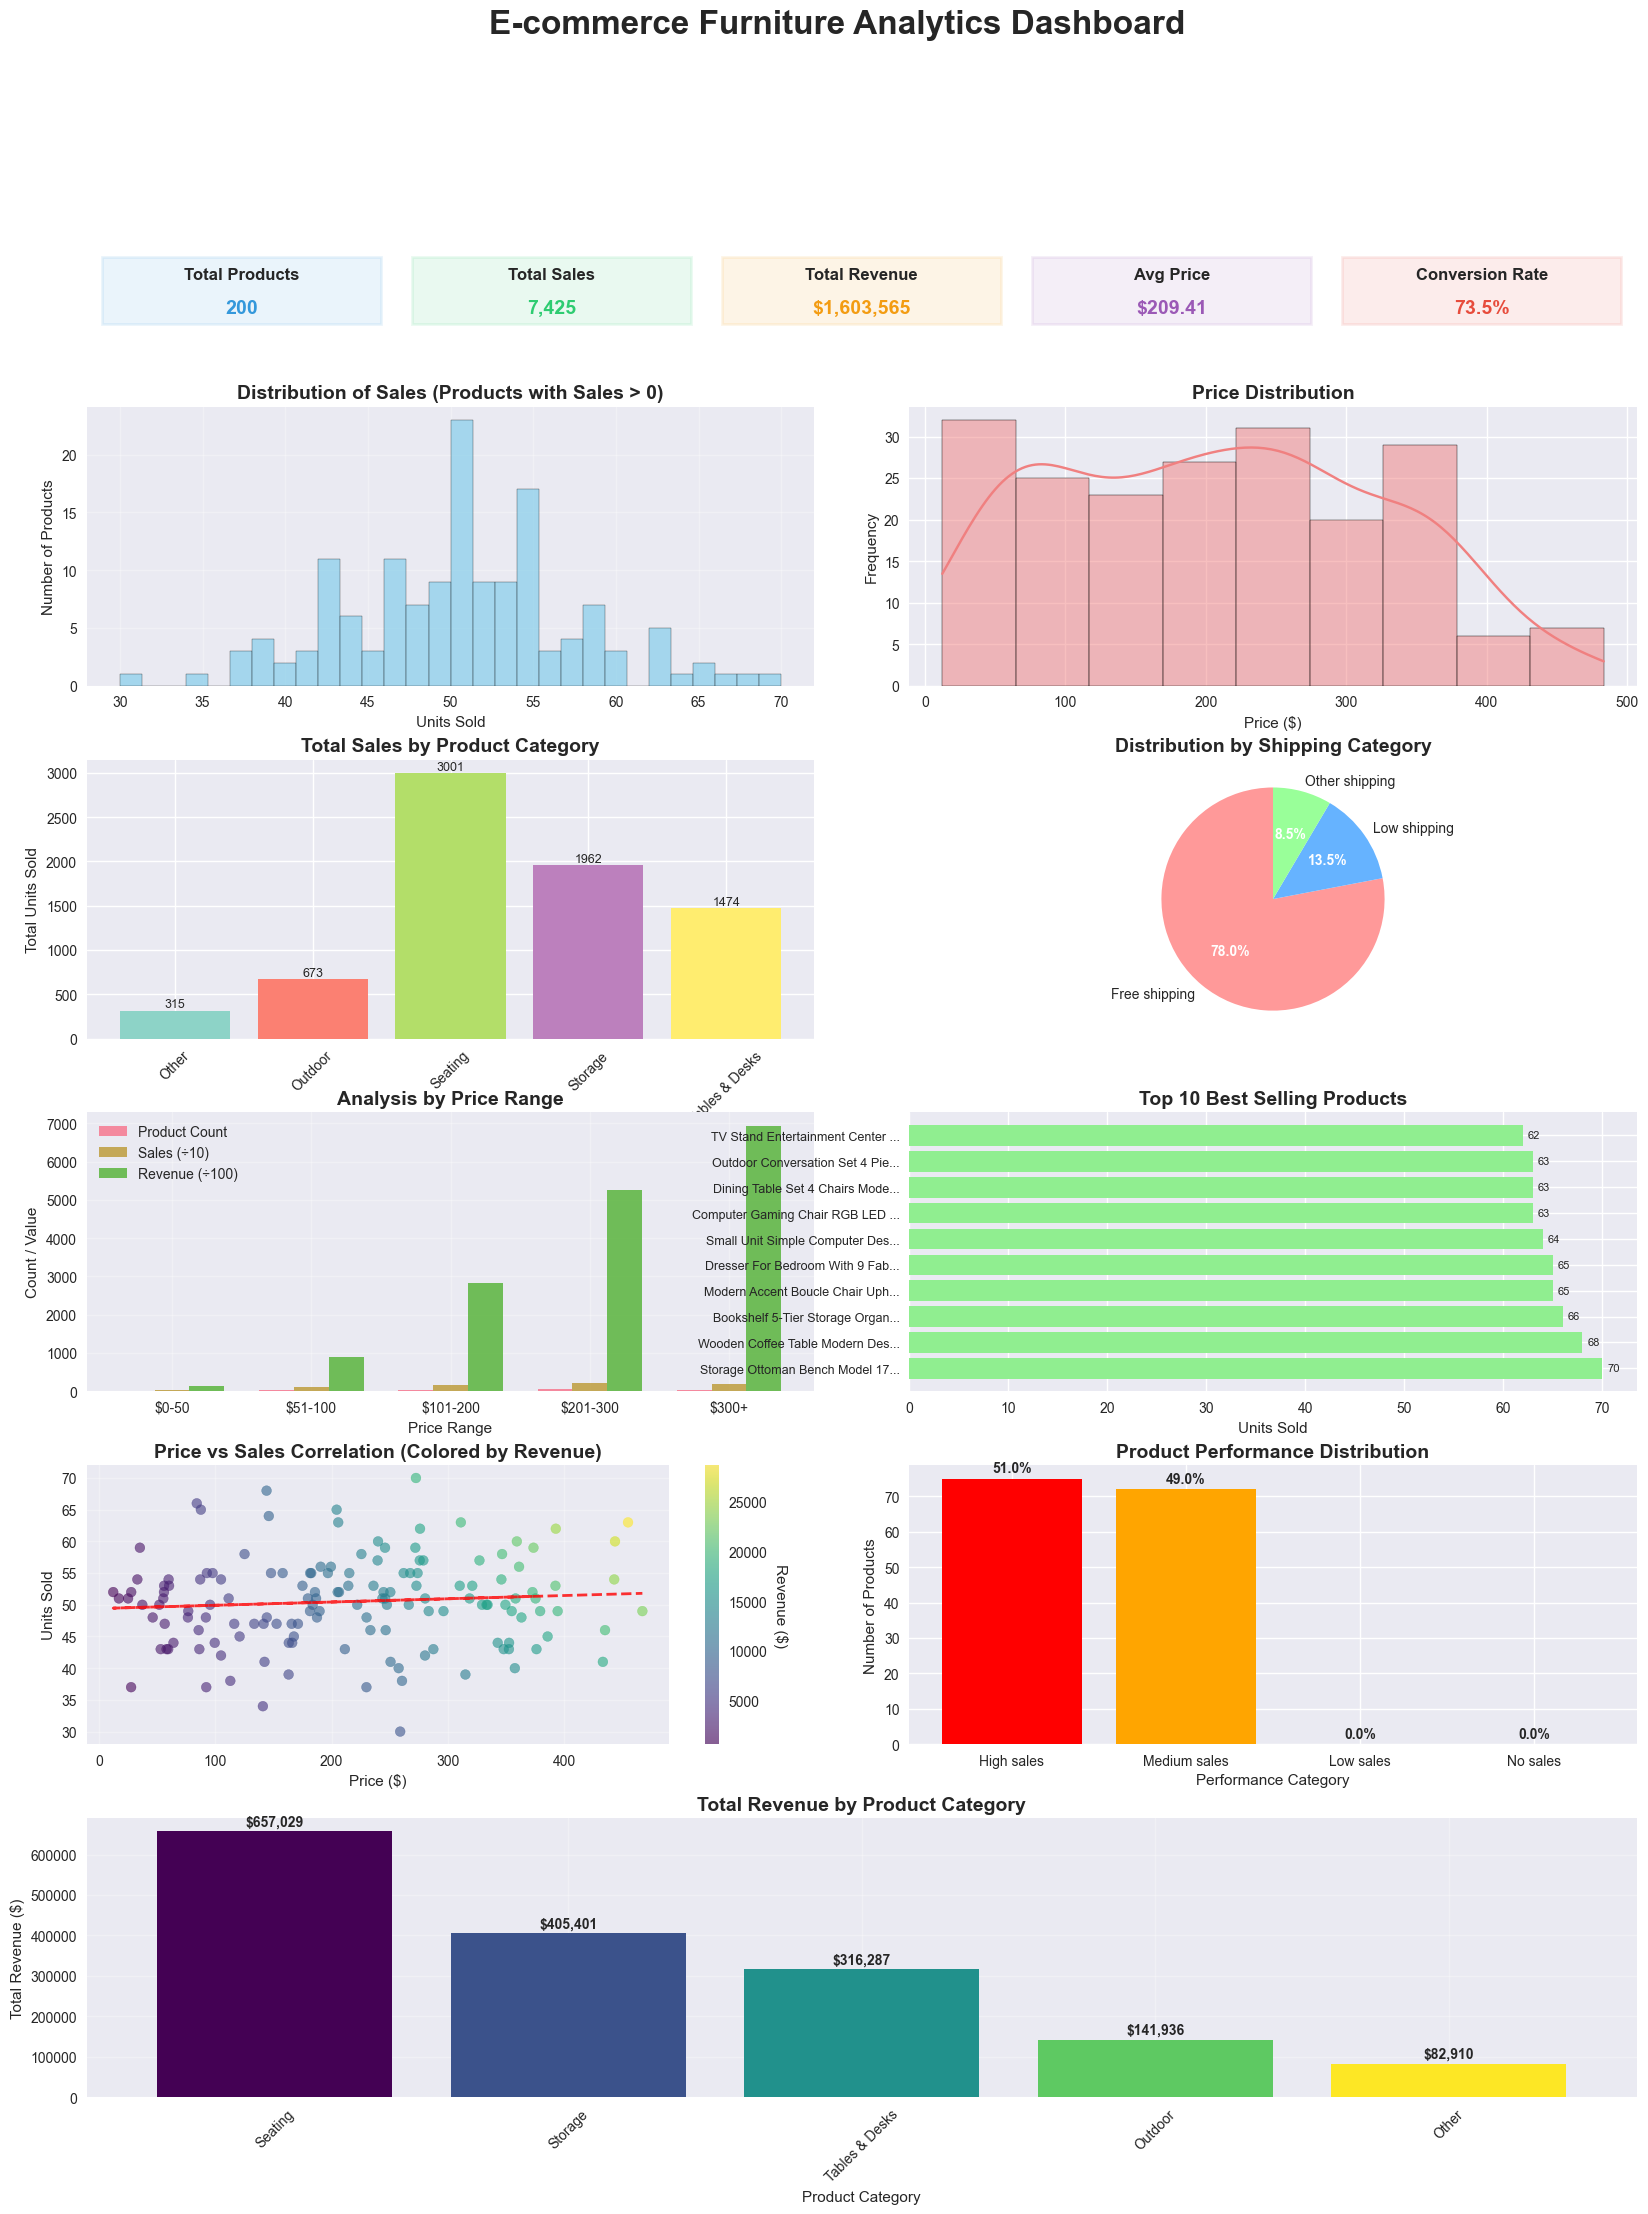


KEY BUSINESS INSIGHTS

📊 OVERALL PERFORMANCE:
   • Total Products: 200
   • Products with Sales: 147 (73.5%)
   • Total Revenue: $1,603,565.25
   • Average Revenue per Product: $8017.83

💰 PRICING INSIGHTS:
   • Average Price: $209.41
   • Median Price: $205.55

🏆 TOP PERFORMING CATEGORY:
   • Seating: $657,029.17 revenue

🚚 SHIPPING INSIGHTS:
   • Free shipping: 78.0% of products, 5,943 total sales
   • Low shipping: 13.5% of products, 980 total sales
   • Other shipping: 8.5% of products, 502 total sales

💵 PRICE RANGE INSIGHTS:
   • Best performing range: $201-300
   • Total sales in this range: 2,109

🎯 RECOMMENDATIONS:
   • Focus inventory on Seating category
   • Optimize pricing in $$201-300 range
   • Consider promoting products with low/no sales

ADDITIONAL STATISTICAL ANALYSIS

Correlation between Price and Sales: 0.090


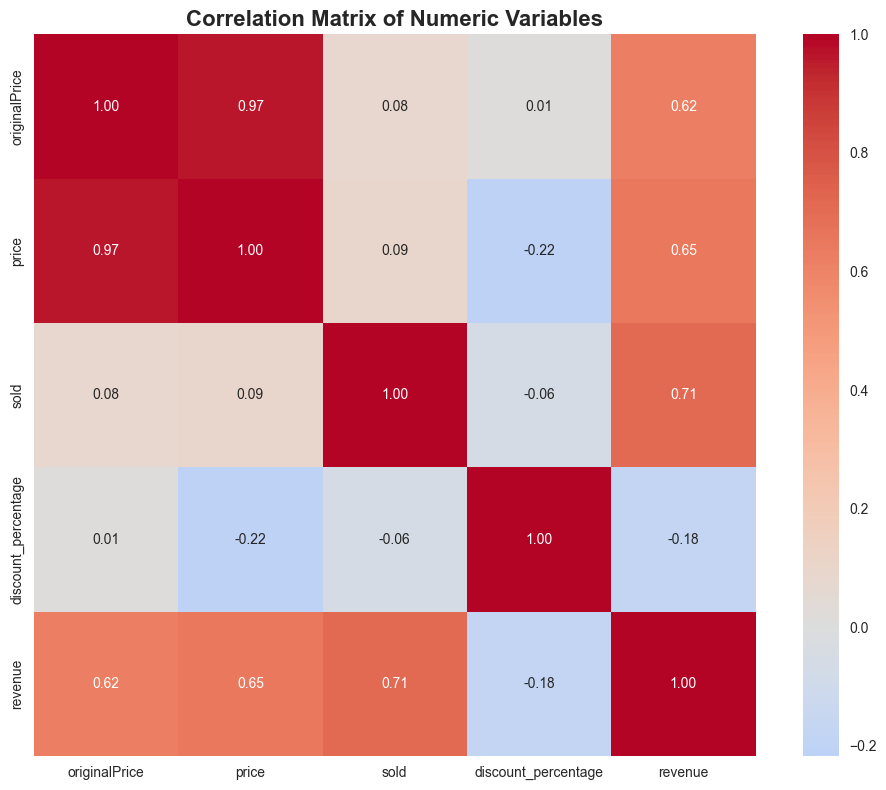

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class FurnitureDashboard:
    def __init__(self, csv_file_path):
        """
        Initialize the dashboard with data loading and cleaning
        """
        self.df = None
        self.cleaned_df = None
        self.load_and_clean_data(csv_file_path)
        
    def load_and_clean_data(self, csv_file_path):
        """
        Load and clean the furniture dataset
        """
        print("Loading and cleaning data...")
        
       
        try:
            self.df = pd.read_csv(csv_file_path)
            print(f"Dataset loaded successfully. Shape: {self.df.shape}")
        except FileNotFoundError:
            print("File not found. Creating sample data for demonstration...")
            self.create_sample_data()
            
        print("\nDataset Info:")
        print(self.df.info())
        print("\nFirst few rows:")
        print(self.df.head())
        
        self.clean_data()
        
    def create_sample_data(self):
        """
        Create sample data for demonstration if actual file not found
        """
        np.random.seed(42)
        
        products = [
            "Dresser For Bedroom With 9 Fabric Drawers",
            "Outdoor Conversation Set 4 Pieces Patio",
            "Modern Accent Boucle Chair Upholstered",
            "Small Unit Simple Computer Desk",
            "Ergonomic Office Chair with Lumbar Support",
            "Wooden Coffee Table Modern Design",
            "Bookshelf 5-Tier Storage Organizer",
            "Dining Table Set 4 Chairs",
            "Wardrobe 3-Door Closet Organizer",
            "TV Stand Entertainment Center",
            "Nightstand Bedside Table",
            "Sofa 3-Seater Living Room",
            "Bar Stool Set of 2",
            "Storage Ottoman Bench",
            "Computer Gaming Chair RGB LED"
        ]
        
       
        data = []
        for i in range(200):
            product = np.random.choice(products) + f" Model {i+1}"
            original_price = np.random.uniform(20, 500)
            discount = np.random.uniform(0, 0.4)  # 0-40% discount
            price = original_price * (1 - discount)
            sold = np.random.poisson(50) if np.random.random() > 0.3 else 0
            
            tag_options = ["Free shipping", "+Shipping: $5.09", "others"]
            tag_weights = [0.8, 0.1, 0.1]
            tag = np.random.choice(tag_options, p=tag_weights)
            
            data.append({
                'productTitle': product,
                'originalPrice': original_price if np.random.random() > 0.2 else np.nan,
                'price': f"${price:.2f}",
                'sold': sold,
                'tagText': tag
            })
            
        self.df = pd.DataFrame(data)
        print("Sample data created for demonstration")
        
    def clean_data(self):
        """
        Clean and preprocess the data
        """
        print("\nCleaning data...")
        
        self.cleaned_df = self.df.copy()
        
        print(f"Missing values before cleaning:\n{self.cleaned_df.isnull().sum()}")
        
        if self.cleaned_df['price'].dtype == 'object':
            self.cleaned_df['price'] = self.cleaned_df['price'].str.replace('[\$,]', '', regex=True).astype(float)
        
        if 'originalPrice' in self.cleaned_df.columns:
           
            missing_pct = self.cleaned_df['originalPrice'].isnull().sum() / len(self.cleaned_df)
            if missing_pct > 0.7:
                print(f"Dropping originalPrice column due to {missing_pct:.1%} missing values")
                self.cleaned_df = self.cleaned_df.drop('originalPrice', axis=1)
            else:
                
                self.cleaned_df['originalPrice'].fillna(self.cleaned_df['price'] * 1.2, inplace=True)
               
                self.cleaned_df['discount_percentage'] = ((self.cleaned_df['originalPrice'] - self.cleaned_df['price']) / self.cleaned_df['originalPrice']) * 100
        
        
        self.cleaned_df['tagText'].fillna('Free shipping', inplace=True)
        
        
        def simplify_shipping(tag):
            if pd.isna(tag):
                return 'Free shipping'
            elif 'Free shipping' in str(tag):
                return 'Free shipping'
            elif '+Shipping: $5.09' in str(tag):
                return 'Low shipping'
            else:
                return 'Other shipping'
                
        self.cleaned_df['shipping_category'] = self.cleaned_df['tagText'].apply(simplify_shipping)
        
        
        self.cleaned_df['product_category'] = self.cleaned_df['productTitle'].apply(self.categorize_product)
        
       
        self.cleaned_df['price_range'] = pd.cut(self.cleaned_df['price'], 
                                               bins=[0, 50, 100, 200, 300, float('inf')],
                                               labels=['$0-50', '$51-100', '$101-200', '$201-300', '$300+'])
        
        
        self.cleaned_df['revenue'] = self.cleaned_df['price'] * self.cleaned_df['sold']
        
        
        self.cleaned_df['performance'] = pd.cut(self.cleaned_df['sold'],
                                              bins=[0, 1, 10, 50, float('inf')],
                                              labels=['No sales', 'Low sales', 'Medium sales', 'High sales'])
        
        print(f"Missing values after cleaning:\n{self.cleaned_df.isnull().sum()}")
        print(f"Cleaned dataset shape: {self.cleaned_df.shape}")
        
    def categorize_product(self, title):
        """
        Categorize products based on title keywords
        """
        title_lower = str(title).lower()
        
        if any(word in title_lower for word in ['chair', 'stool', 'seat']):
            return 'Seating'
        elif any(word in title_lower for word in ['table', 'desk']):
            return 'Tables & Desks'
        elif any(word in title_lower for word in ['dresser', 'wardrobe', 'closet', 'storage', 'organizer']):
            return 'Storage'
        elif any(word in title_lower for word in ['bed', 'nightstand', 'bedroom']):
            return 'Bedroom'
        elif any(word in title_lower for word in ['sofa', 'couch', 'living']):
            return 'Living Room'
        elif any(word in title_lower for word in ['outdoor', 'patio', 'garden']):
            return 'Outdoor'
        else:
            return 'Other'
    
    def calculate_key_metrics(self):
        """
        Calculate key business metrics
        """
        metrics = {
            'total_products': len(self.cleaned_df),
            'total_sales': self.cleaned_df['sold'].sum(),
            'total_revenue': self.cleaned_df['revenue'].sum(),
            'avg_price': self.cleaned_df['price'].mean(),
            'median_price': self.cleaned_df['price'].median(),
            'avg_sales_per_product': self.cleaned_df['sold'].mean(),
            'products_with_sales': (self.cleaned_df['sold'] > 0).sum(),
            'conversion_rate': (self.cleaned_df['sold'] > 0).mean() * 100,
            'top_selling_product': self.cleaned_df.loc[self.cleaned_df['sold'].idxmax(), 'productTitle'] if self.cleaned_df['sold'].max() > 0 else 'N/A',
            'highest_revenue_product': self.cleaned_df.loc[self.cleaned_df['revenue'].idxmax(), 'productTitle'] if self.cleaned_df['revenue'].max() > 0 else 'N/A'
        }
        
        return metrics
    
    def create_dashboard(self):
        """
        Create comprehensive dashboard with multiple visualizations
        """
       
        metrics = self.calculate_key_metrics()
        
        
        fig = plt.figure(figsize=(20, 24))
        fig.suptitle('E-commerce Furniture Analytics Dashboard', fontsize=24, fontweight='bold', y=0.98)
        
        
        gs = fig.add_gridspec(6, 4, height_ratios=[0.3, 1, 1, 1, 1, 1], hspace=0.3, wspace=0.3)
        
       
        self.create_metrics_panel(fig, gs, metrics)
        
     
        ax1 = fig.add_subplot(gs[1, :2])
        self.plot_sales_distribution(ax1)
        
       
        ax2 = fig.add_subplot(gs[1, 2:])
        self.plot_price_distribution(ax2)
        
        
        ax3 = fig.add_subplot(gs[2, :2])
        self.plot_category_performance(ax3)
        
      
        ax4 = fig.add_subplot(gs[2, 2:])
        self.plot_shipping_analysis(ax4)
        
      
        ax5 = fig.add_subplot(gs[3, :2])
        self.plot_price_range_analysis(ax5)
        
      
        ax6 = fig.add_subplot(gs[3, 2:])
        self.plot_top_performers(ax6)
        
        
        ax7 = fig.add_subplot(gs[4, :2])
        self.plot_price_vs_sales(ax7)
        
       
        ax8 = fig.add_subplot(gs[4, 2:])
        self.plot_performance_distribution(ax8)
        
       
        ax9 = fig.add_subplot(gs[5, :])
        self.plot_revenue_analysis(ax9)
        
        plt.tight_layout()
        plt.show()
        
        
        self.print_insights(metrics)
        
    def create_metrics_panel(self, fig, gs, metrics):
        """
        Create key metrics panel
        """
        ax_metrics = fig.add_subplot(gs[0, :])
        ax_metrics.axis('off')
        
        
        metric_data = [
            ('Total Products', f"{metrics['total_products']:,}", '#3498db'),
            ('Total Sales', f"{metrics['total_sales']:,}", '#2ecc71'),
            ('Total Revenue', f"${metrics['total_revenue']:,.0f}", '#f39c12'),
            ('Avg Price', f"${metrics['avg_price']:.2f}", '#9b59b6'),
            ('Conversion Rate', f"{metrics['conversion_rate']:.1f}%", '#e74c3c')
        ]
        
        box_width = 0.18
        box_height = 0.8
        
        for i, (title, value, color) in enumerate(metric_data):
            x = i * 0.2 + 0.01
            
          
            rect = Rectangle((x, 0.1), box_width, box_height, facecolor=color, alpha=0.1, edgecolor=color, linewidth=2)
            ax_metrics.add_patch(rect)
            
            
            ax_metrics.text(x + box_width/2, 0.7, title, ha='center', va='center', fontsize=12, fontweight='bold')
            ax_metrics.text(x + box_width/2, 0.3, value, ha='center', va='center', fontsize=14, fontweight='bold', color=color)
        
        ax_metrics.set_xlim(0, 1)
        ax_metrics.set_ylim(0, 1)
        
    def plot_sales_distribution(self, ax):
        """
        Plot sales distribution histogram
        """
        
        sales_data = self.cleaned_df[self.cleaned_df['sold'] > 0]['sold']
        
        ax.hist(sales_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_title('Distribution of Sales (Products with Sales > 0)', fontsize=14, fontweight='bold')
        ax.set_xlabel('Units Sold')
        ax.set_ylabel('Number of Products')
        ax.grid(True, alpha=0.3)
        
    def plot_price_distribution(self, ax):
        """
        Plot price distribution with KDE
        """
        sns.histplot(data=self.cleaned_df, x='price', kde=True, ax=ax, color='lightcoral')
        ax.set_title('Price Distribution', fontsize=14, fontweight='bold')
        ax.set_xlabel('Price ($)')
        ax.set_ylabel('Frequency')
        
    def plot_category_performance(self, ax):
        """
        Plot category performance
        """
        category_stats = self.cleaned_df.groupby('product_category').agg({
            'sold': 'sum',
            'revenue': 'sum',
            'productTitle': 'count'
        }).round(2)
        
        category_stats.columns = ['Total Sales', 'Total Revenue', 'Product Count']
        
       
        bars = ax.bar(category_stats.index, category_stats['Total Sales'], 
                     color=plt.cm.Set3(np.linspace(0, 1, len(category_stats))))
        
        ax.set_title('Total Sales by Product Category', fontsize=14, fontweight='bold')
        ax.set_xlabel('Product Category')
        ax.set_ylabel('Total Units Sold')
        ax.tick_params(axis='x', rotation=45)
        
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{int(height)}', ha='center', va='bottom', fontsize=9)
        
    def plot_shipping_analysis(self, ax):
        """
        Plot shipping method analysis
        """
        shipping_data = self.cleaned_df['shipping_category'].value_counts()
        
        colors = ['#ff9999', '#66b3ff', '#99ff99']
        wedges, texts, autotexts = ax.pie(shipping_data.values, labels=shipping_data.index, 
                                         autopct='%1.1f%%', colors=colors, startangle=90)
        
        ax.set_title('Distribution by Shipping Category', fontsize=14, fontweight='bold')
        
        
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            
    def plot_price_range_analysis(self, ax):
        """
        Plot price range analysis
        """
        price_range_stats = self.cleaned_df.groupby('price_range').agg({
            'productTitle': 'count',
            'sold': 'sum',
            'revenue': 'sum'
        })
        
        x = np.arange(len(price_range_stats.index))
        width = 0.25
        
        bars1 = ax.bar(x - width, price_range_stats['productTitle'], width, label='Product Count', alpha=0.8)
        bars2 = ax.bar(x, price_range_stats['sold']/10, width, label='Sales (÷10)', alpha=0.8)
        bars3 = ax.bar(x + width, price_range_stats['revenue']/100, width, label='Revenue (÷100)', alpha=0.8)
        
        ax.set_title('Analysis by Price Range', fontsize=14, fontweight='bold')
        ax.set_xlabel('Price Range')
        ax.set_ylabel('Count / Value')
        ax.set_xticks(x)
        ax.set_xticklabels(price_range_stats.index)
        ax.legend()
        ax.grid(True, alpha=0.3)
        
    def plot_top_performers(self, ax):
        """
        Plot top performing products
        """
        top_products = self.cleaned_df.nlargest(10, 'sold')[['productTitle', 'sold']]
        
        top_products['short_title'] = top_products['productTitle'].apply(
            lambda x: x[:30] + '...' if len(x) > 30 else x
        )
        
        bars = ax.barh(range(len(top_products)), top_products['sold'], color='lightgreen')
        ax.set_yticks(range(len(top_products)))
        ax.set_yticklabels(top_products['short_title'], fontsize=9)
        ax.set_xlabel('Units Sold')
        ax.set_title('Top 10 Best Selling Products', fontsize=14, fontweight='bold')
        
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                   f'{int(width)}', ha='left', va='center', fontsize=8)
        
    def plot_price_vs_sales(self, ax):
        """
        Plot price vs sales correlation
        """
       
        scatter_data = self.cleaned_df[self.cleaned_df['sold'] > 0]
        
        scatter = ax.scatter(scatter_data['price'], scatter_data['sold'], 
                           alpha=0.6, c=scatter_data['revenue'], 
                           cmap='viridis', s=50)
        
        ax.set_xlabel('Price ($)')
        ax.set_ylabel('Units Sold')
        ax.set_title('Price vs Sales Correlation (Colored by Revenue)', fontsize=14, fontweight='bold')
        
       
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label('Revenue ($)', rotation=270, labelpad=15)
        
       
        z = np.polyfit(scatter_data['price'], scatter_data['sold'], 1)
        p = np.poly1d(z)
        ax.plot(scatter_data['price'], p(scatter_data['price']), "r--", alpha=0.8, linewidth=2)
        
        ax.grid(True, alpha=0.3)
        
    def plot_performance_distribution(self, ax):
        """
        Plot performance category distribution
        """
        perf_counts = self.cleaned_df['performance'].value_counts()
        
        bars = ax.bar(perf_counts.index, perf_counts.values, 
                     color=['red', 'orange', 'yellow', 'green'])
        
        ax.set_title('Product Performance Distribution', fontsize=14, fontweight='bold')
        ax.set_xlabel('Performance Category')
        ax.set_ylabel('Number of Products')
        
        total = perf_counts.sum()
        for bar in bars:
            height = bar.get_height()
            pct = (height/total) * 100
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')
        
    def plot_revenue_analysis(self, ax):
        """
        Plot revenue analysis by category
        """
        revenue_by_category = self.cleaned_df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
        
        bars = ax.bar(revenue_by_category.index, revenue_by_category.values, 
                     color=plt.cm.viridis(np.linspace(0, 1, len(revenue_by_category))))
        
        ax.set_title('Total Revenue by Product Category', fontsize=14, fontweight='bold')
        ax.set_xlabel('Product Category')
        ax.set_ylabel('Total Revenue ($)')
        ax.tick_params(axis='x', rotation=45)
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + max(revenue_by_category)*0.01,
                   f'${int(height):,}', ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        ax.grid(True, alpha=0.3)
        
    def print_insights(self, metrics):
        """
        Print key business insights
        """
        print("\n" + "="*80)
        print("KEY BUSINESS INSIGHTS")
        print("="*80)
        
        print(f"\n📊 OVERALL PERFORMANCE:")
        print(f"   • Total Products: {metrics['total_products']:,}")
        print(f"   • Products with Sales: {metrics['products_with_sales']:,} ({metrics['conversion_rate']:.1f}%)")
        print(f"   • Total Revenue: ${metrics['total_revenue']:,.2f}")
        print(f"   • Average Revenue per Product: ${metrics['total_revenue']/metrics['total_products']:.2f}")
        
        print(f"\n💰 PRICING INSIGHTS:")
        print(f"   • Average Price: ${metrics['avg_price']:.2f}")
        print(f"   • Median Price: ${metrics['median_price']:.2f}")
        
        category_performance = self.cleaned_df.groupby('product_category').agg({
            'sold': 'sum',
            'revenue': 'sum',
            'price': 'mean'
        }).round(2)
        
        best_category = category_performance['revenue'].idxmax()
        print(f"\n🏆 TOP PERFORMING CATEGORY:")
        print(f"   • {best_category}: ${category_performance.loc[best_category, 'revenue']:,.2f} revenue")
        
        shipping_performance = self.cleaned_df.groupby('shipping_category')['sold'].sum()
        print(f"\n🚚 SHIPPING INSIGHTS:")
        for shipping, sales in shipping_performance.items():
            pct = (self.cleaned_df['shipping_category'] == shipping).mean() * 100
            print(f"   • {shipping}: {pct:.1f}% of products, {sales:,} total sales")
        
        price_range_performance = self.cleaned_df.groupby('price_range').agg({
            'sold': 'sum',
            'productTitle': 'count'
        })
        
        best_price_range = price_range_performance['sold'].idxmax()
        print(f"\n💵 PRICE RANGE INSIGHTS:")
        print(f"   • Best performing range: {best_price_range}")
        print(f"   • Total sales in this range: {price_range_performance.loc[best_price_range, 'sold']:,}")
        
        print(f"\n🎯 RECOMMENDATIONS:")
        print(f"   • Focus inventory on {best_category} category")
        print(f"   • Optimize pricing in ${best_price_range} range")
        print(f"   • Consider promoting products with low/no sales")
        if metrics['conversion_rate'] < 50:
            print(f"   • Investigate why {100-metrics['conversion_rate']:.1f}% of products have no sales")
        
        print("="*80)

def main():
    """
    Main function to run the dashboard
    """
    
    dashboard = FurnitureDashboard('ecommerce_furniture_dataset_2024.csv')
    
    dashboard.create_dashboard()
    
 
    print("\n" + "="*50)
    print("ADDITIONAL STATISTICAL ANALYSIS")
    print("="*50)
    
    numeric_cols = dashboard.cleaned_df.select_dtypes(include=[np.number]).columns
    correlation_matrix = dashboard.cleaned_df[numeric_cols].corr()
    
    print(f"\nCorrelation between Price and Sales: {correlation_matrix.loc['price', 'sold']:.3f}")
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f')
    plt.title('Correlation Matrix of Numeric Variables', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":
    main()
